# Binary classification Kaggle Jan 2024

## Exploratory Data Analysis

### Import libraries used

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt  

### Loading Data

In [3]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")


In [4]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
train.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

### Selecting Appropritate Features

In [7]:
train = train[["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]]


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [9]:
train.nunique()

CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

### Convert features to their appropriate type

In [10]:
train["Age"].max()

92.0

In [11]:
train["Balance"].max()

250898.09

In [12]:
train["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
train["Age"] = train["Age"].astype(np.int8)
train["Tenure"] = train["Tenure"].astype(np.int8)
train["Balance"] = train["Balance"].astype(np.int32)
train["NumOfProducts"] = train["NumOfProducts"].astype(np.int8)
train["HasCrCard"] = train["HasCrCard"].astype(bool)
train["IsActiveMember"] = train["IsActiveMember"].astype(bool)
train["Exited"] = train["Exited"].astype(bool)
train["EstimatedSalary"] = train["EstimatedSalary"].astype(np.int64)
train['Gender'] = train['Gender'].map({'Male': bool(0), 'Female': bool(1), 0:bool(0), 1:bool(1)})
train['Geography'] = train['Geography'].astype('category')
train['Geography'] = train['Geography'].cat.codes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CreditScore      165034 non-null  int64
 1   Geography        165034 non-null  int8 
 2   Gender           165034 non-null  bool 
 3   Age              165034 non-null  int8 
 4   Tenure           165034 non-null  int8 
 5   Balance          165034 non-null  int32
 6   NumOfProducts    165034 non-null  int8 
 7   HasCrCard        165034 non-null  bool 
 8   IsActiveMember   165034 non-null  bool 
 9   EstimatedSalary  165034 non-null  int64
 10  Exited           165034 non-null  bool 
dtypes: bool(4), int32(1), int64(2), int8(4)
memory usage: 4.4 MB


### Save the data frame we have done so far

In [14]:
train.to_csv("data/preprocessed_trained_data.csv", index = False)

In [15]:
train.describe()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,0.648545,38.125883,5.020353,55477.860556,1.554455,112574.324436
std,80.103340,0.816574,8.867207,2.806159,62817.425547,0.547154,50292.865280
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,11.000000
25%,597.000000,0.000000,32.000000,3.000000,0.000000,1.000000,74637.000000
50%,659.000000,0.000000,37.000000,5.000000,0.000000,2.000000,117948.000000
75%,710.000000,1.000000,42.000000,7.000000,119939.000000,2.000000,155152.250000
max,850.000000,2.000000,92.000000,10.000000,250898.000000,4.000000,199992.000000


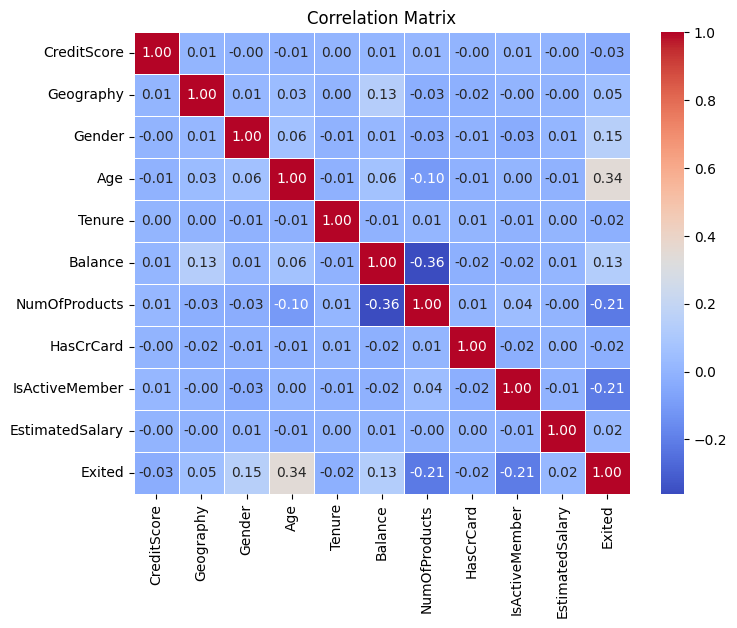

In [16]:
correlation_matrix = train.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

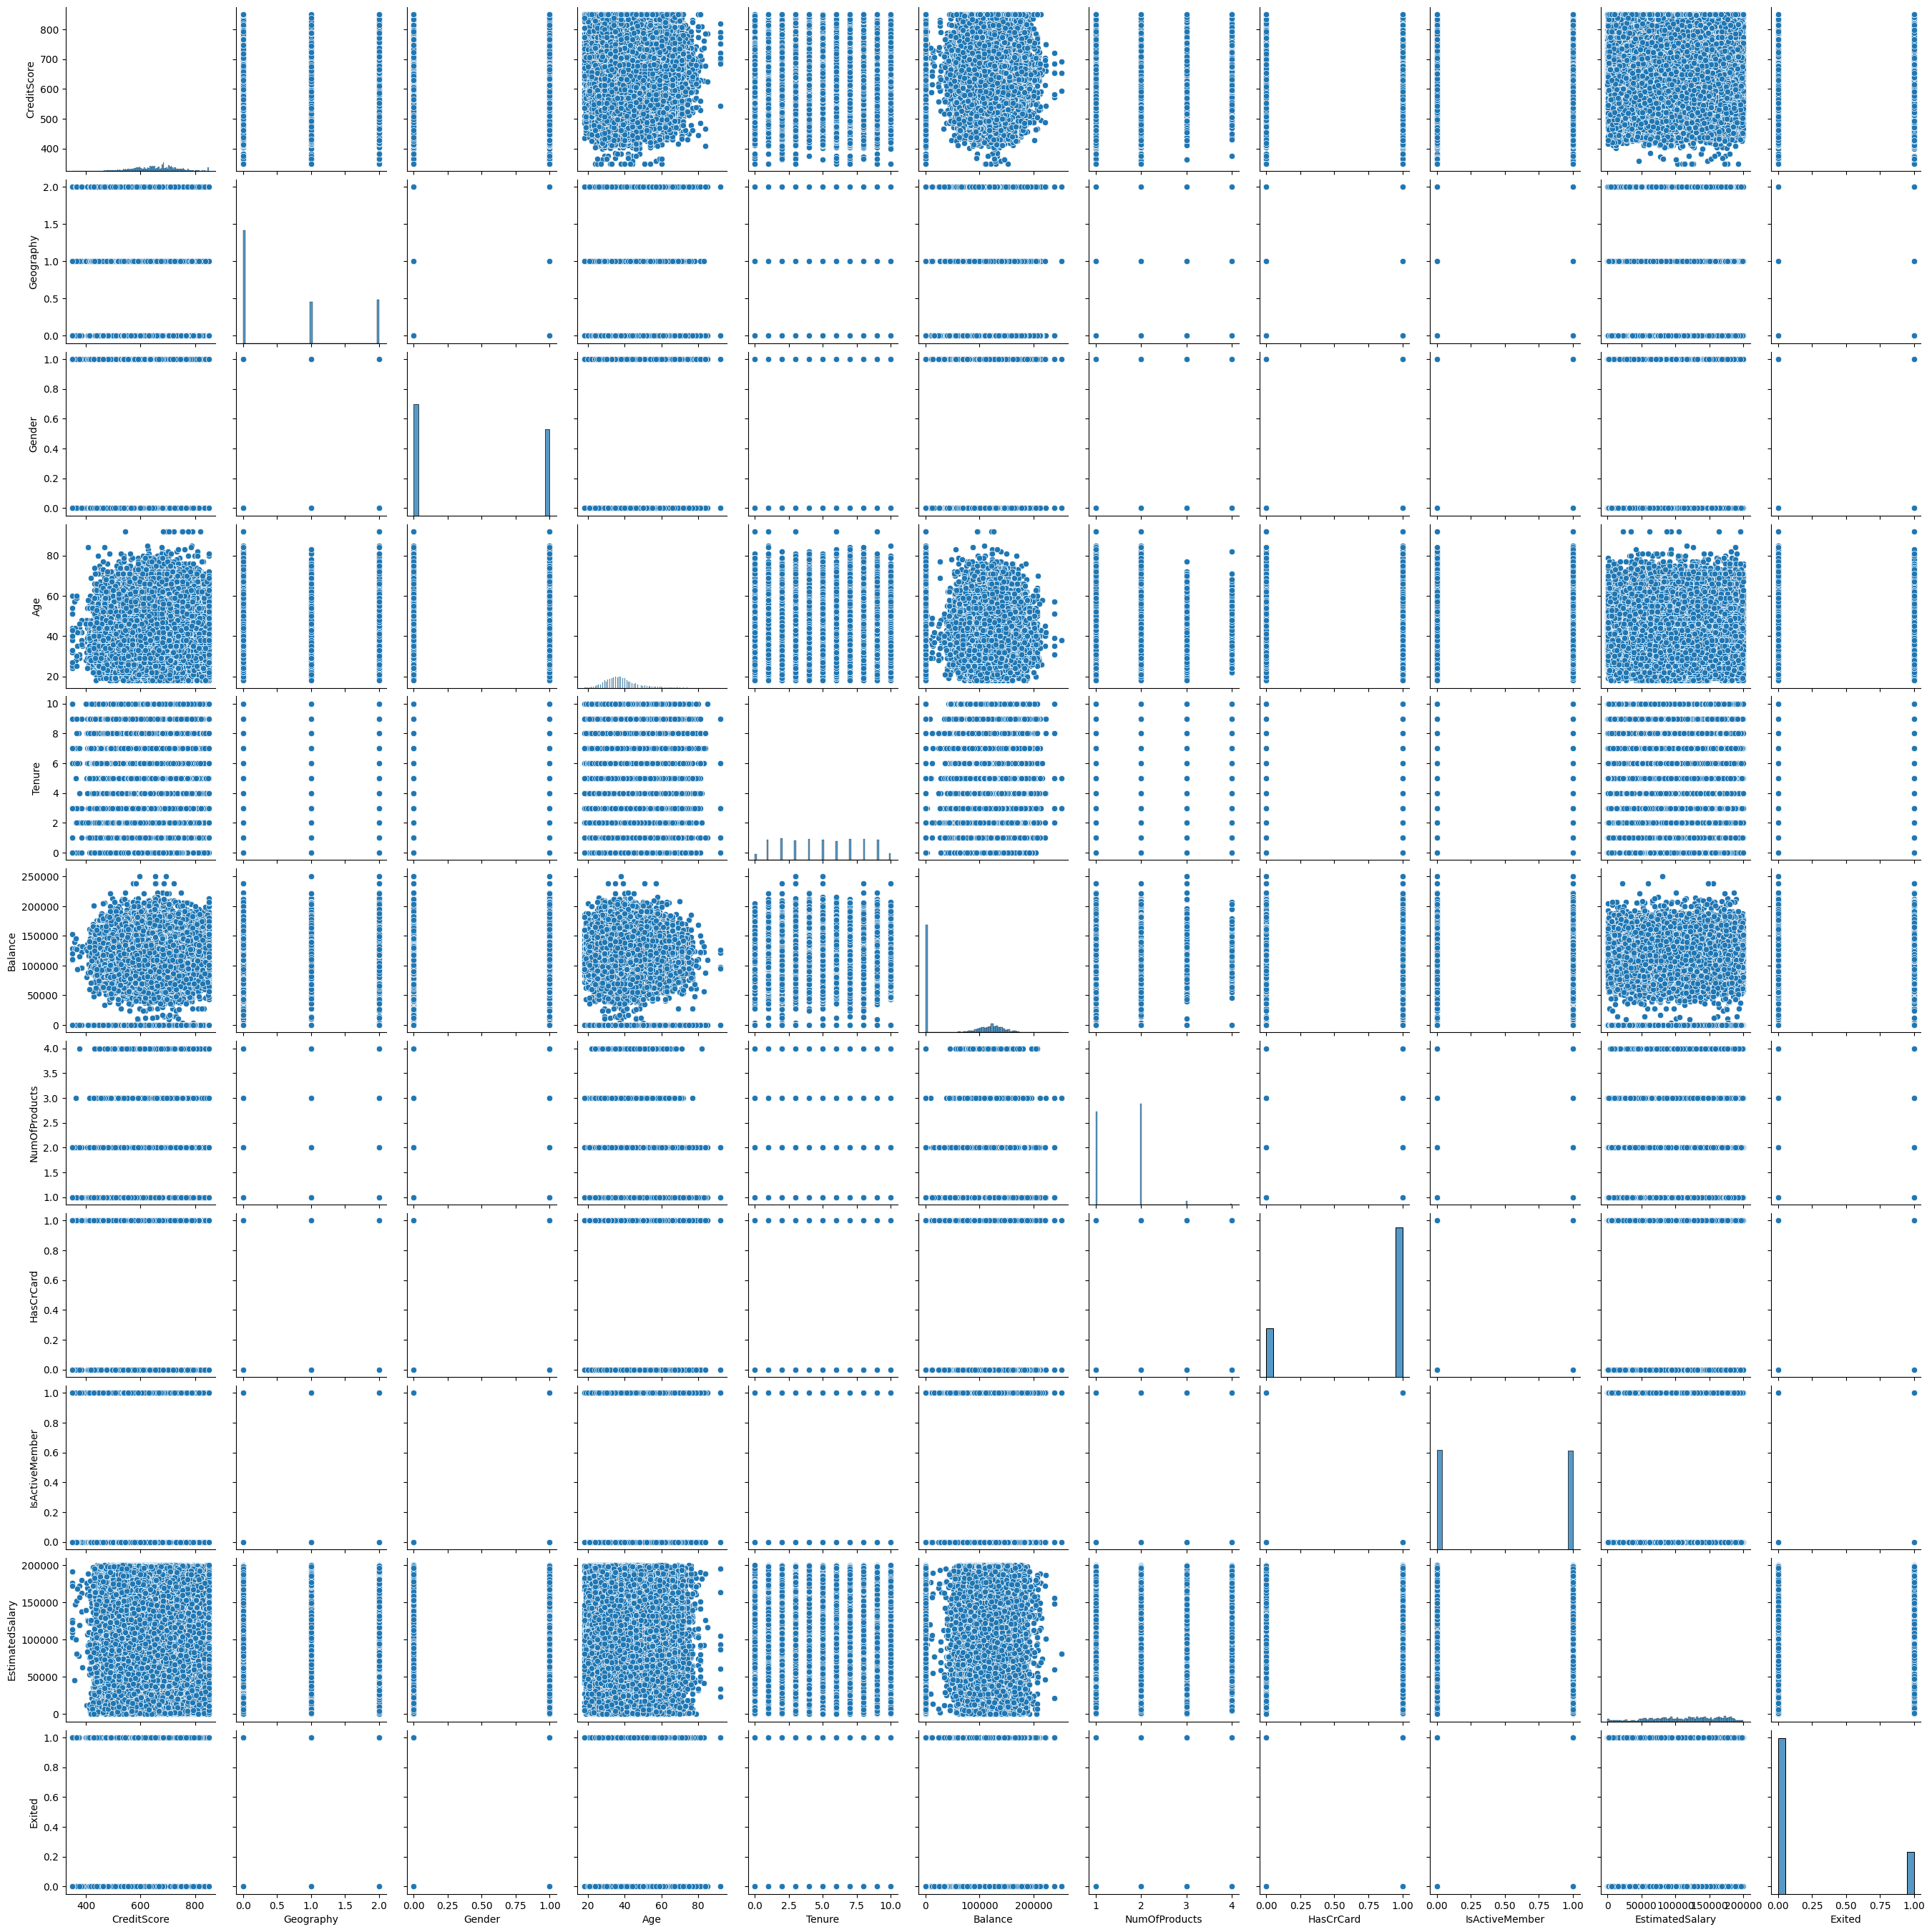

In [17]:
train["EstimatedSalary"].unique()
sns.pairplot(train)
plt.show()

### Perform Analysis on numerical features

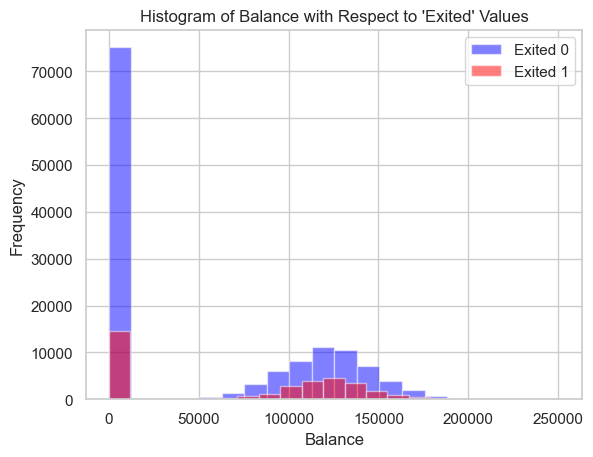

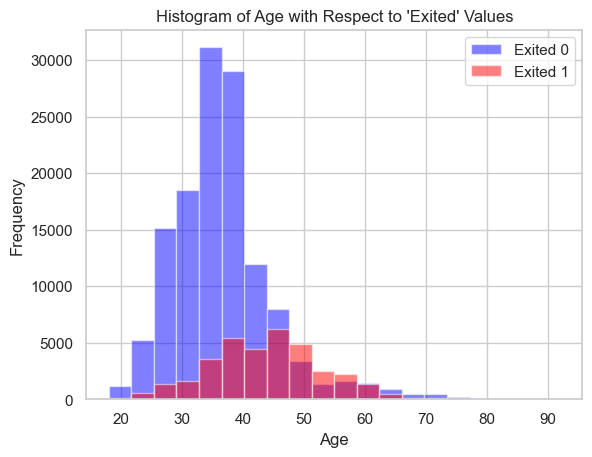

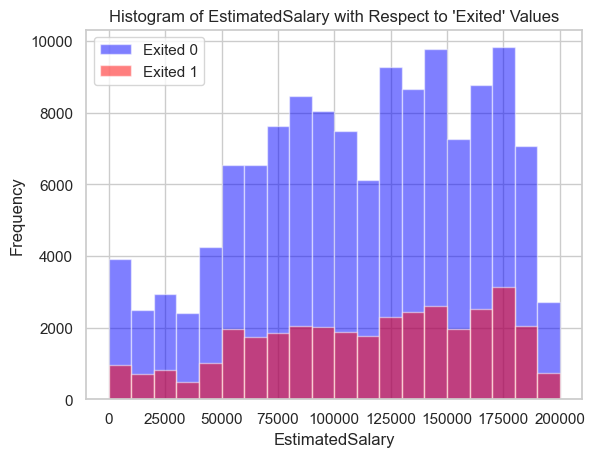

In [52]:
# Assuming 'Balance' is the column you want to create a histogram for
num_features = ["Balance", "Age", "EstimatedSalary"]
target_column = "Exited"

# Separate data based on 'Exited' value
exited_0 = train[train[target_column] == 0]
exited_1 = train[train[target_column] == 1]

# Create histograms for each 'Exited' value
for n in num_features:
    plt.hist(exited_0[n], bins=20, alpha=0.5, label='Exited 0', color='blue')
    plt.hist(exited_1[n], bins=20, alpha=0.5, label='Exited 1', color='red')

    plt.xlabel(n)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f"Histogram of {n} with Respect to 'Exited' Values")
    plt.show()

In [56]:
# Assuming 'target_column' is the name of your target column
# and 'train' is your DataFrame
target_column = 'Exited'

# List of numerical features
numerical_features = ["Balance", "Age", "EstimatedSalary"]

# Create a pivot table
pivot_table = pd.pivot_table(train, values=numerical_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table)

# Create a pivot table for balance  0
pivot_table_balance_0 = pd.pivot_table(train[train["Balance"] == 0], values=numerical_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table_balance_0)

# Create a pivot table for other balances
pivot_table_balance_1 = pd.pivot_table(train[train["Balance"] != 0], values=numerical_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table_balance_1)

              Age       Balance  EstimatedSalary
Exited                                          
False   36.560474  51255.598633    112083.794917
True    43.958478  71209.688554    114402.000258
              Age  Balance  EstimatedSalary
Exited                                     
False   36.340997      0.0    111838.924144
True    44.069487      0.0    114041.688725
              Age        Balance  EstimatedSalary
Exited                                           
False   36.860618  121349.777189    112418.665957
True    43.879730  121724.682265    114657.599393


### Perform Analysis on categorial features

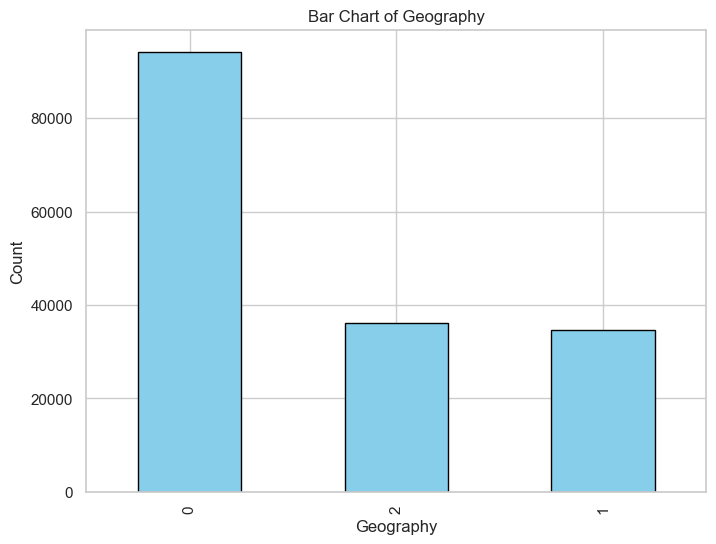

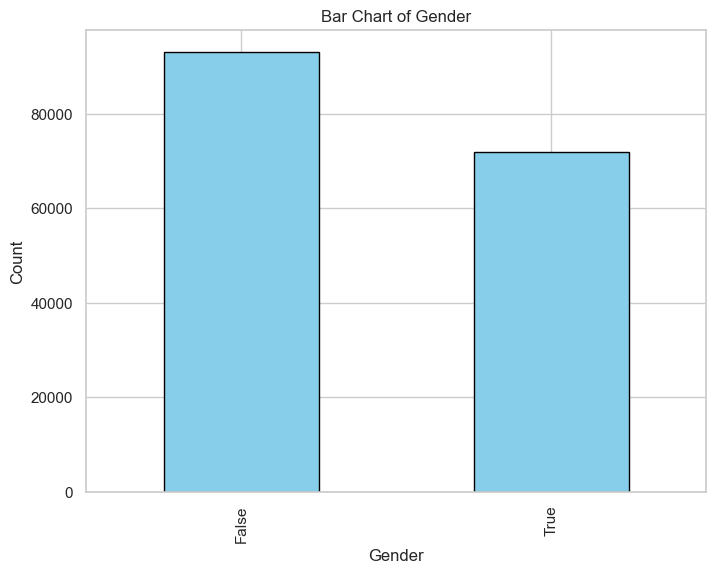

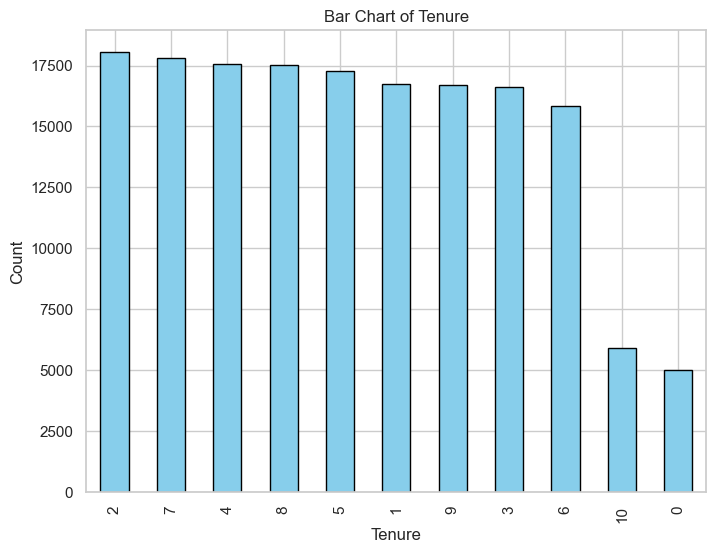

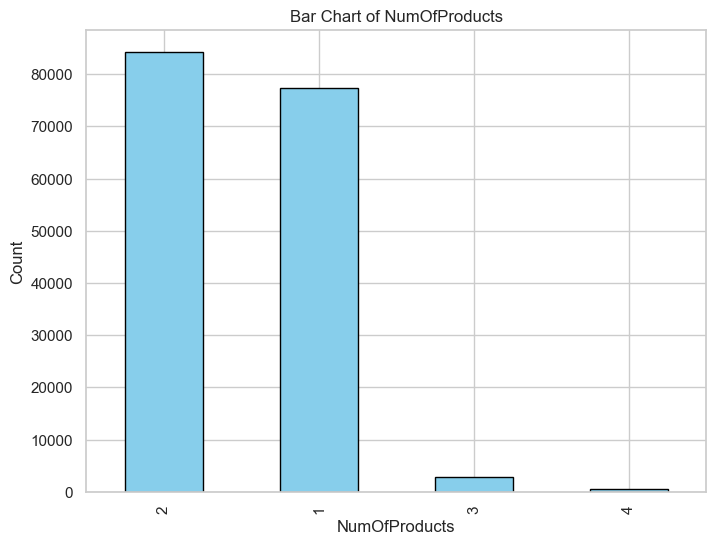

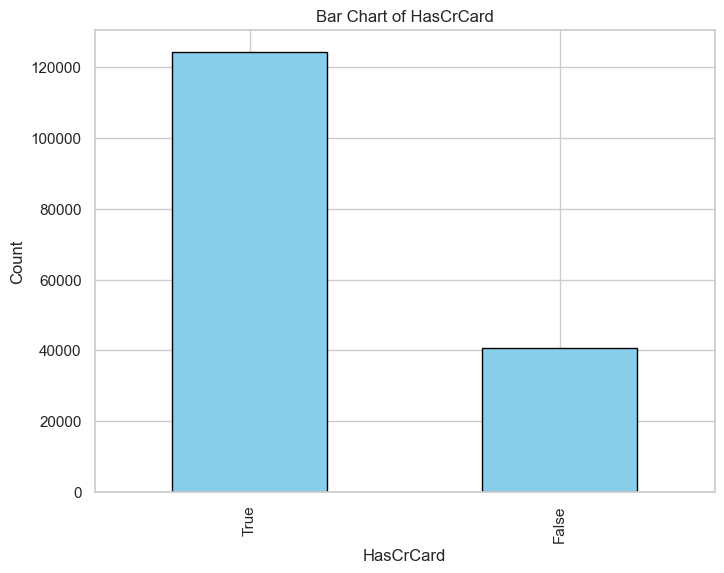

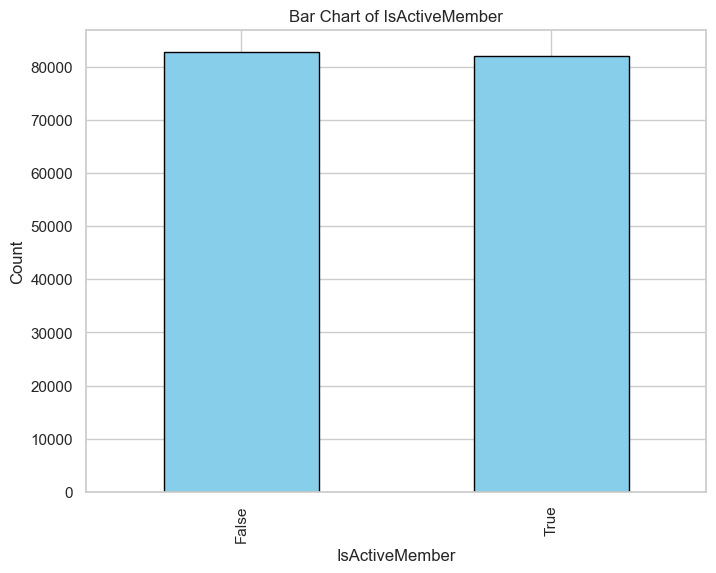

          Gender  Geography  HasCrCard  IsActiveMember  NumOfProducts  \
Exited                                                                  
False   0.397954   0.625979   0.758894        0.552228       1.615273   
True    0.575728   0.732625   0.735546        0.294866       1.327854   

          Tenure  
Exited            
False   5.048796  
True    4.914378  
          Gender  Geography  HasCrCard  IsActiveMember  NumOfProducts  \
Exited                                                                  
False   0.397267   0.542551   0.766366        0.546224       1.817899   
True    0.588463   0.550028   0.741651        0.289815       1.343569   

          Tenure  
Exited            
False   5.070241  
True    4.936241  
          Gender  Geography  HasCrCard  IsActiveMember  NumOfProducts  \
Exited                                                                  
False   0.398894   0.740070   0.748676        0.560438       1.338173   
True    0.566694   0.862157   0.731215     

In [59]:
# Assuming 'target_column' is the name of your target column
# and 'train' is your DataFrame
target_column = 'Exited'

# List of numerical features
categorial_features = ["Geography", "Gender", "Tenure", "NumOfProducts","HasCrCard","IsActiveMember"]

for feature in categorial_features:
    plt.figure(figsize=(8, 6))
    train[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Bar Chart of {feature}')
    plt.show()
# Create a pivot table
pivot_table = pd.pivot_table(train, values=categorial_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table)

# Create a pivot table for balance  0
pivot_table_balance_0 = pd.pivot_table(train[train["Balance"] == 0], values=categorial_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table_balance_0)

# Create a pivot table for other balances
pivot_table_balance_1 = pd.pivot_table(train[train["Balance"] != 0], values=categorial_features, index=target_column, aggfunc='mean')

# Display the pivot table
print(pivot_table_balance_1)

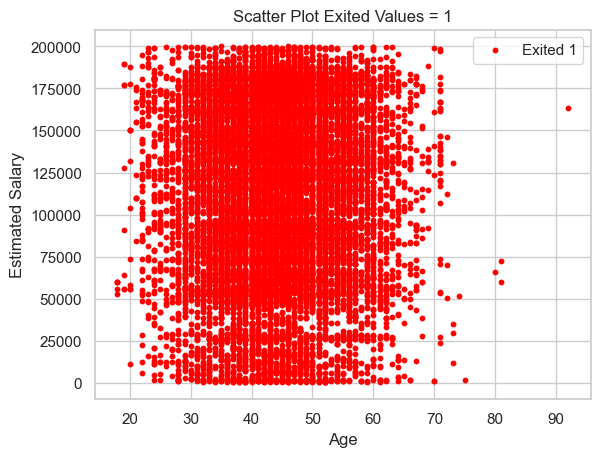

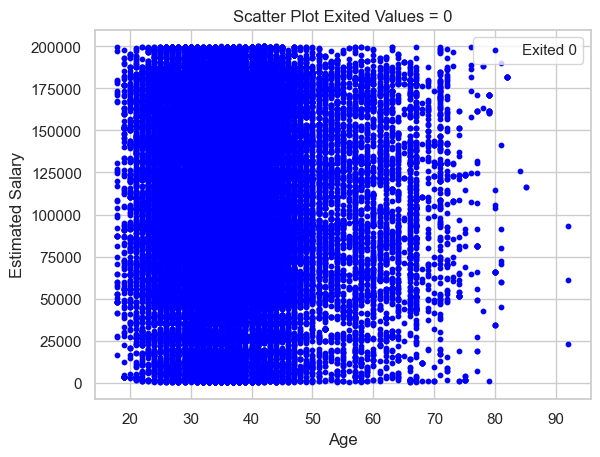

In [50]:
# Separate data based on 'exit' value
exited_0 = train[(train['Exited'] == 0) & (train["Balance"] == 0)]
exited_1 = train[(train['Exited'] == 1) & (train["Balance"] == 0)]

# Create a scatter plot with different colors for each 'exited' value
plt.scatter(exited_1['Age'], exited_1['EstimatedSalary'], c='red', label='Exited 1', s=10)
# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Scatter Plot Exited Values = 1')
plt.show()
plt.scatter(exited_0['Age'], exited_0['EstimatedSalary'], c='blue', label='Exited 0', s=10)
# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Scatter Plot Exited Values = 0')
plt.show()

In [54]:
train[train["Balance"] == 0].count()/train[train["Balance"] != 0].count()

CreditScore        1.189186
Geography          1.189186
Gender             1.189186
Age                1.189186
Tenure             1.189186
Balance            1.189186
NumOfProducts      1.189186
HasCrCard          1.189186
IsActiveMember     1.189186
EstimatedSalary    1.189186
Exited             1.189186
dtype: float64

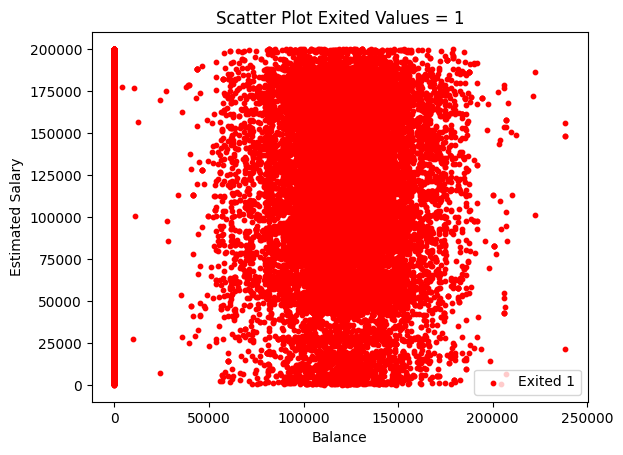

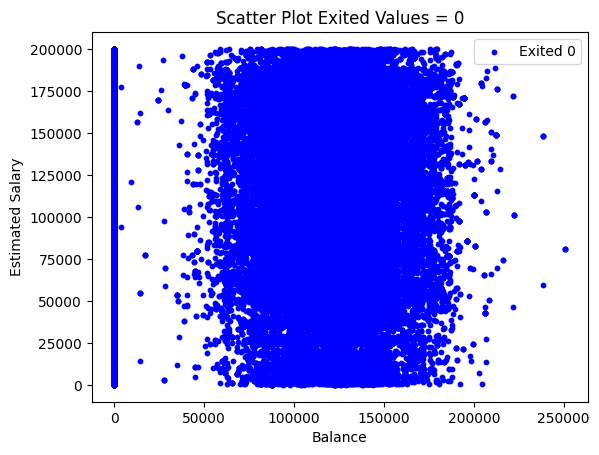

In [18]:
# Separate data based on 'exit' value
exited_0 = train[train['Exited'] == 0]
exited_1 = train[train['Exited'] == 1]

# Create a scatter plot with different colors for each 'exited' value
plt.scatter(exited_1['Balance'], exited_1['EstimatedSalary'], c='red', label='Exited 1', s=10)
# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Scatter Plot Exited Values = 1')
plt.show()
plt.scatter(exited_0['Balance'], exited_0['EstimatedSalary'], c='blue', label='Exited 0', s=10)
# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('Scatter Plot Exited Values = 0')
plt.show()

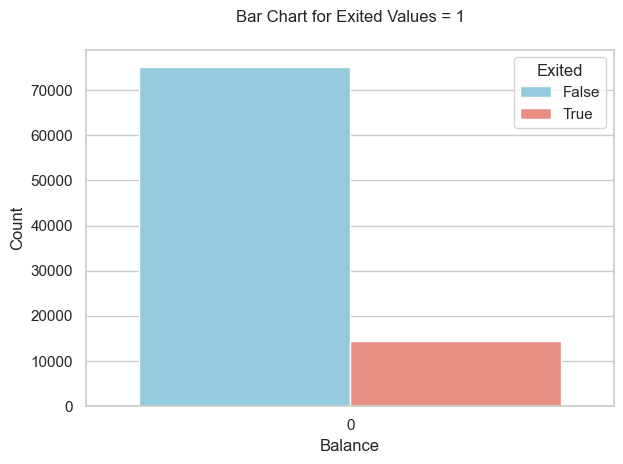

In [19]:
# Set the style for the plot
sns.set(style='whitegrid', palette='pastel')

# Create a countplot with a hue for 'Exited'
sns.countplot(x='Balance', hue='Exited', data=pd.concat([exited_0[exited_0['Balance'] == 0], exited_1[exited_1['Balance'] == 0]]), palette=['skyblue', 'salmon'])

# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')

# Title with a bit more space
plt.title('Bar Chart for Exited Values = 1', pad=20)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
print(train["Tenure"].nunique())

11


In [21]:
train["Tenure"].unique()

array([ 3,  1, 10,  2,  5,  4,  8,  6,  9,  7,  0], dtype=int8)

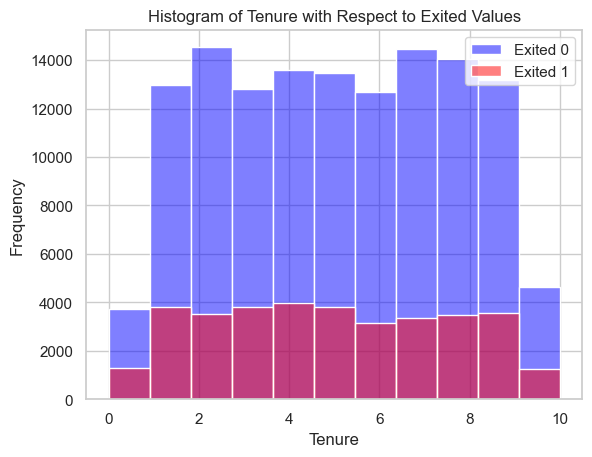

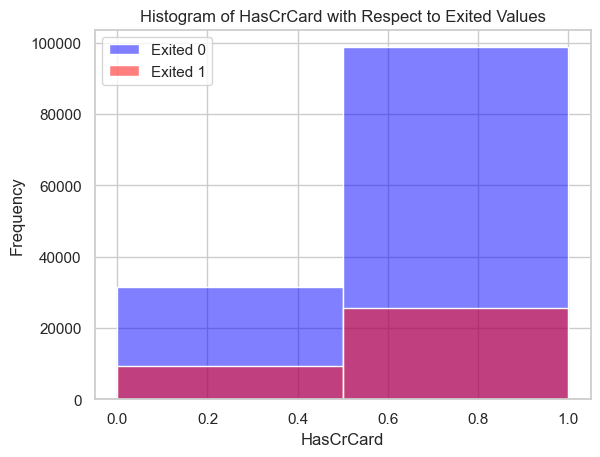

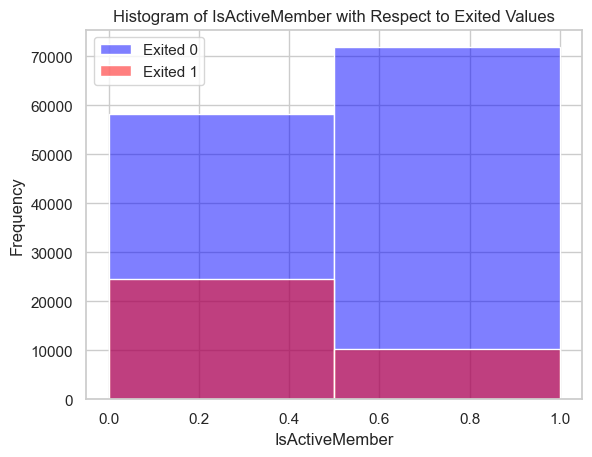

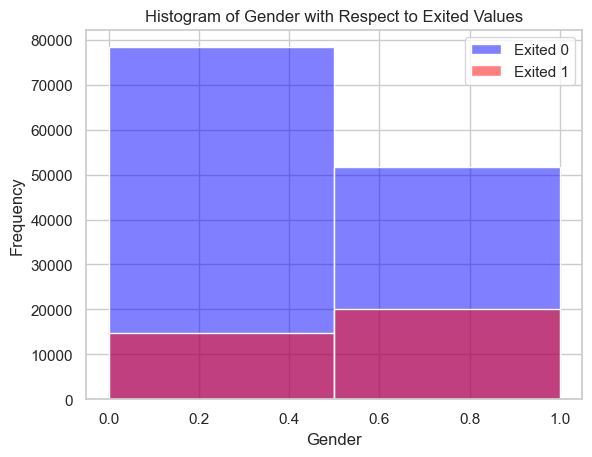

In [22]:
for i in ["Tenure","HasCrCard","IsActiveMember","Gender"]:
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")

    # Create histograms for each 'exit' value using Seaborn
    sns.histplot(exited_0[i], bins=train[i].nunique(), alpha=0.5, label='Exited 0', color='blue')
    sns.histplot(exited_1[i], bins=train[i].nunique(), alpha=0.5, label='Exited 1', color='red')

    # Add labels and legend
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Histogram of '+ i + ' with Respect to Exited Values')

    # Show the plot
    plt.show()

## Feature Engineering

Before deciding which algorithm to balance the imbalanced classificaion, we need to know what is the ratio between Exited == 0, and Exited == 1

In [23]:
print(len(exited_0)/len(exited_1))

3.72592422897397


This is considered a moderate imbalance in the dataset. So, we will use SMOTE to balance the data set.

In [40]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

from tqdm import tqdm  # Import tqdm for progress bars

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
train_without_balance = train[train["Balance"] != 0]
# Assuming 'X' contains your features and 'y' contains your target variable
X = train_without_balance.drop('Exited', axis=1)  # Replace 'target_column' with your actual target column name
y = train_without_balance['Exited']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine SMOTE with Edited Nearest Neighbors (SMOTEENN)
smote_enn = SMOTE(random_state=42)
X_resampled, y_resampled = (X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

# Define classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Iterate through classifiers with tqdm for a progress bar
for name, clf in classifiers.items():
    # Train classifier on the resampled data
    clf.fit(X_resampled, y_resampled)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Print classification report
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))

print("--------------------------------------------------------------")

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
train_with_balance = train[train["Balance"] == 0]
# Assuming 'X' contains your features and 'y' contains your target variable
X = train_with_balance.drop('Exited', axis=1)  # Replace 'target_column' with your actual target column name
y = train_with_balance['Exited']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine SMOTE with Edited Nearest Neighbors (SMOTEENN)
smote_enn = SMOTE(random_state=42)
X_resampled, y_resampled = (X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

# Define classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Iterate through classifiers with tqdm for a progress bar
for name, clf in classifiers.items():
    # Train classifier on the resampled data
    clf.fit(X_resampled, y_resampled)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Print classification report
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))

Class distribution after SMOTE:
 Exited
False    43942
True     16366
Name: count, dtype: int64

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

       False       0.74      0.87      0.80     11015
        True       0.31      0.15      0.20      4063

    accuracy                           0.68     15078
   macro avg       0.52      0.51      0.50     15078
weighted avg       0.62      0.68      0.64     15078


Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.83      0.93      0.88     11015
        True       0.72      0.50      0.59      4063

    accuracy                           0.81     15078
   macro avg       0.78      0.71      0.73     15078
weighted avg       0.80      0.81      0.80     15078



c:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for LogisticRegression:
               precision    recall  f1-score   support

       False       0.76      0.94      0.84     11015
        True       0.57      0.21      0.30      4063

    accuracy                           0.74     15078
   macro avg       0.67      0.57      0.57     15078
weighted avg       0.71      0.74      0.70     15078

Class distribution after SMOTE:
 Exited
False    60170
True     11548
Name: count, dtype: int64

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

       False       0.84      0.97      0.90     14986
        True       0.29      0.06      0.10      2944

    accuracy                           0.82     17930
   macro avg       0.57      0.52      0.50     17930
weighted avg       0.75      0.82      0.77     17930


Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94     14986
 

c:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [67]:
test["Age"] = test["Age"].astype(np.int8)
test["Tenure"] = test["Tenure"].astype(np.int8)
test["Balance"] = test["Balance"].astype(np.int32)
test["NumOfProducts"] = test["NumOfProducts"].astype(np.int8)
test["HasCrCard"] = test["HasCrCard"].astype(bool)
test["IsActiveMember"] = test["IsActiveMember"].astype(bool)
test["EstimatedSalary"] = test["EstimatedSalary"].astype(np.int64)
test['Gender'] = test['Gender'].map({'Male': bool(0), 'Female': bool(1), 0:bool(0), 1:bool(1)})
test['Geography'] = test['Geography'].astype('category')
test['Geography'] = test['Geography'].cat.codes

In [70]:
test.to_csv("data/preprocessed_test_data.csv", index = False)
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,True,23,2,0,2,False,True,160976
1,165035,15782418,Nott,683,0,True,46,2,0,1,True,False,72549
2,165036,15807120,K?,656,0,True,34,7,0,2,True,False,138882
3,165037,15808905,O'Donnell,681,0,False,36,8,0,1,True,False,113931
4,165038,15607314,Higgins,752,1,False,38,10,121263,1,True,False,139431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,2,False,29,7,116099,1,True,True,148087
110019,275053,15774133,Cox,575,0,True,36,4,178032,1,True,True,42181
110020,275054,15728456,Ch'iu,712,0,False,31,2,0,2,True,False,16287
110021,275055,15687541,Yegorova,709,0,True,32,3,0,1,True,True,158816


In [141]:
# Assuming 'X' contains your features and 'y' contains your target variable
X = train.drop('Exited', axis=1)  # Replace 'target_column' with your actual target column name
y = train['Exited']

# Create subsets based on 'Balance'
X_balance_zero = X[X['Balance'] == 0]
y_balance_zero = y[X['Balance'] == 0]

X_balance_nonzero = X[X['Balance'] != 0]
y_balance_nonzero = y[X['Balance'] != 0]

# Split each subset into train and test sets
X_train_zero, X_test_zero, y_train_zero, y_test_zero = train_test_split(X_balance_zero, y_balance_zero, test_size=0.2, random_state=42)
X_train_nonzero, X_test_nonzero, y_train_nonzero, y_test_nonzero = train_test_split(X_balance_nonzero, y_balance_nonzero, test_size=0.2, random_state=42)

# Train random forest models
rf_model_zero = RandomForestClassifier(random_state=42)
rf_model_zero.fit(X_balance_zero, y_balance_zero)

rf_model_nonzero = RandomForestClassifier(random_state=42)
rf_model_nonzero.fit(X_balance_nonzero, y_balance_nonzero)

ignored_features = ['CustomerId', 'Surname', 'id']

# Make predictions on the test set
temp_test_zero = test[test["Balance"] == 0]
temp_test_nonzero = test[test["Balance"] != 0]

# Make predictions using the appropriate model for each subset
y_pred_zero = rf_model_zero.predict_proba(temp_test_zero.drop(ignored_features, axis=1))[:, 1]
y_pred_nonzero = rf_model_nonzero.predict_proba(temp_test_nonzero.drop(ignored_features, axis=1))[:, 1]

# Combine the predictions back into the original order
y_pred = pd.concat([pd.Series(y_pred_zero, index=temp_test_zero.index), pd.Series(y_pred_nonzero, index=temp_test_nonzero.index)])

In [142]:
result_df = pd.concat([test["id"], y_pred], axis=1, keys=['id', 'Exited'])
result_df

,id,Exited
0,165034,0.000
1,165035,0.910
2,165036,0.000
3,165037,0.105
4,165038,0.200
...,...,...
110018,275052,0.110
110019,275053,0.100
110020,275054,0.000
110021,275055,0.130


In [ ]:
result_df.to_csv("data/submission.csv", index = False)